In [3]:
from typing import TypedDict, Literal


class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float 
    target_currency: Literal["INR","EUR"]
    total: float

In [5]:
def calc_total(state: PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd']*1.08
    return state

def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state['total'] = state['total_usd']* 85
    return state

def convert_to_eur(state: PortfolioState) -> PortfolioState:
    state['total'] = state['total_usd']* 0.9
    return state

def choose_conversition(state: PortfolioState) ->str:
    return state['target_currency']


In [10]:
from langgraph.graph import StateGraph,START,END

builder = StateGraph(PortfolioState)


### Adding the nodes
builder.add_node("calculate_usd_method_node",calc_total)
builder.add_node("converting_to_inr_node",convert_to_inr)
builder.add_node("converting_to_eur_node",convert_to_eur)


###adding the edges

builder.add_edge(START,"calculate_usd_method_node")
builder.add_conditional_edges("calculate_usd_method_node",choose_conversition,{
    "INR" : "converting_to_inr_node",
    "EUR" : "converting_to_eur_node",
})
builder.add_edge(["converting_to_inr_node","converting_to_eur_node"],END)

graph= builder.compile()



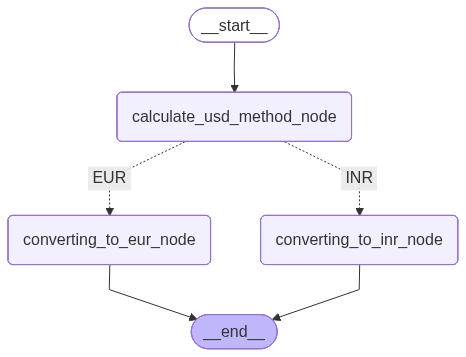

In [11]:
from IPython.display import display ,Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [12]:
graph.invoke({"amount_usd":1,"target_currency":"INR"})

{'amount_usd': 1,
 'total_usd': 1.08,
 'target_currency': 'INR',
 'total': 91.80000000000001}

In [13]:
graph.invoke({"amount_usd":1,"target_currency":"EUR"})

{'amount_usd': 1,
 'total_usd': 1.08,
 'target_currency': 'EUR',
 'total': 0.9720000000000001}